In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')

products = products[['product_name', 'product_id']]
order_products = order_products[['product_id', 'order_id']]
orders = orders[['order_id', 'order_dow']]
orders = orders.set_index('order_id')


In [16]:
row = 0
cookie_id = []
cereal_id = []
ice_cream_id = []
coffee_id = []
apple_id = []
broccoli_id = []
for product in products['product_name']:
    if re.search('[Cc]ookie', product) is not None:
        cookie_id.append(products['product_id'].loc[row])
    if re.search('[Cc]ereal', product) is not None:
        cereal_id.append(products['product_id'].loc[row])
    if re.search('[Ii]ce [Cc]ream', product) is not None:
        ice_cream_id.append(products['product_id'].loc[row])
    if re.search('[Cc]offee', product) is not None:
        coffee_id.append(products['product_id'].loc[row])
    if re.search('[Aa]pple', product) is not None:
        apple_id.append(products['product_id'].loc[row])
    if re.search('[Bb]roccoli', product) is not None:
        broccoli_id.append(products['product_id'].loc[row])
    row += 1

In [17]:
def times_from_id(prod_id_list):
    days = []
    for prod in prod_id_list:
        is_prod_id = order_products['product_id'] == prod
        order_id = order_products[is_prod_id]
        #print(order_id.shape[0])

        for order in order_id['order_id']:
            day_of_week = orders['order_dow'].loc[order]
            days.append(day_of_week)
    return days

In [19]:
cookie_days = times_from_id(cookie_id)
cereal_days = times_from_id(cereal_id)
ice_cream_days = times_from_id(ice_cream_id)
coffee_days = times_from_id(coffee_id)
apple_days = times_from_id(apple_id)
broccoli_days = times_from_id(broccoli_id)

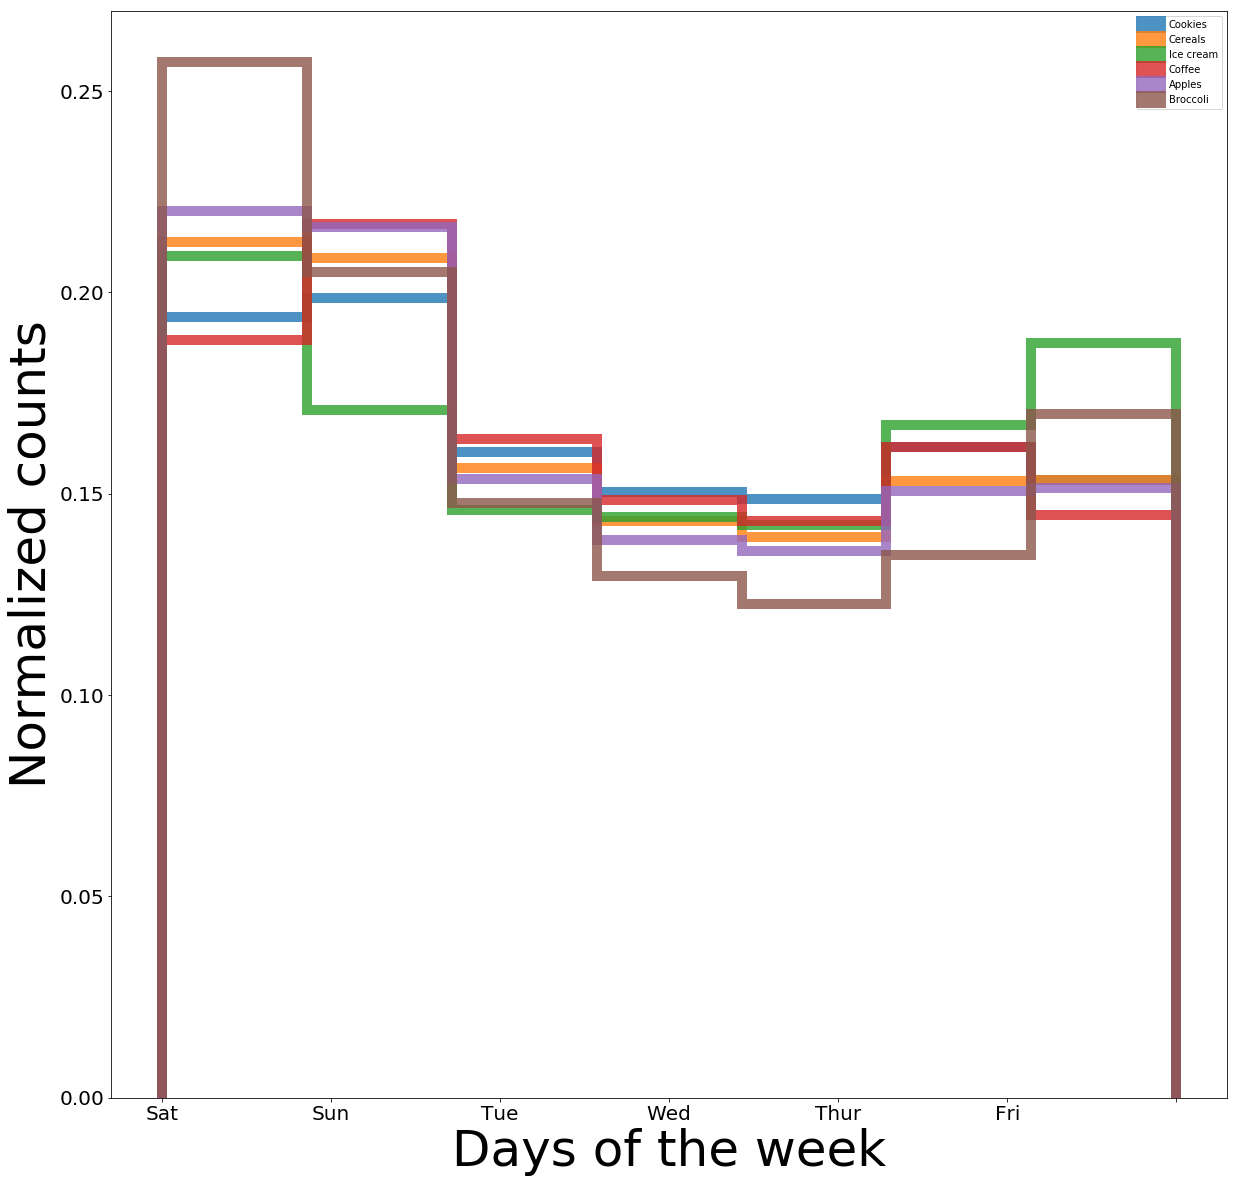

In [35]:
plt.hist(cookie_days, bins = 7, alpha = 0.8, normed=True, label = 'Cookies', histtype = 'step', linewidth = 10)
plt.hist(cereal_days, bins = 7, alpha = 0.8, normed=True, label = 'Cereals', histtype = 'step', linewidth = 10)
plt.hist(ice_cream_days, bins = 7, alpha = 0.8, normed=True, label = 'Ice cream', histtype = 'step', linewidth = 10)
plt.hist(coffee_days, bins = 7, alpha = 0.8, normed=True, label = 'Coffee', histtype = 'step', linewidth = 10)
plt.hist(apple_days, bins = 7, alpha = 0.8, normed=True, label = 'Apples', histtype = 'step', linewidth = 10)
plt.hist(broccoli_days, bins = 7, alpha = 0.8, normed=True, label = 'Broccoli', histtype = 'step', linewidth = 10)


plt.ylabel('Normalized counts', fontsize = 50)
plt.yticks(fontsize = 20)
plt.xlabel('Days of the week', fontsize = 50)
my_xticks = ['Sat', 'Sun', 'Tue', 'Wed', 'Thur', 'Fri']
plt.xticks([0,1,2,3,4,5,6], my_xticks, fontsize = 20)
plt.legend(loc = 'upper right')
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

# Purchases for different days of the week

The histograms are normalized to compare trends. We can see that more broccoli orders see a sharp increase on Saturdays. Similarly Apples are also bought more on Saturdays. While the orders of ice cream are less than in the beginning, it sees the shapest increase in orders on Thursday and Friday. Further studies would explore if we can see a correlation between "healthy" vs "unhealthy" food depending on the weekday a user shops.